# Multi page web scraping

In [131]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [132]:
def get_soup(url):
    headers = {
        'authority': 'www.amazon.in',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'max-age=0',
        'device-memory': '8',
        'downlink': '10',
        'dpr': '0.8',
        'ect': '4g',
        'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
        'rtt': '0',
        'sec-ch-device-memory': '8',
        'sec-ch-dpr': '0.8',
        'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-ch-viewport-width': '2400',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-user': '?1',
        'service-worker-navigation-preload': 'true',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
        'viewport-width': '2400',
    }
    
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

# Looping multiple pages

In [133]:
# Initialize list to store reviews data later on
reviewlist = []

In [134]:
# Function to scrape reviews from a page
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
                'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
                'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [135]:
# Define the URL of the product reviews page
product_url = 'https://www.amazon.in/OnePlus-43-inches-Android-Pro/product-reviews/B09VCHLSJF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsxt_2?ie=UTF8&reviewerType=all_reviews&pageNumber={}%27'


In [136]:
# Set the range of pages to scrape
start_page = 1
end_page = 10


In [137]:
# Loop through the specified range of pages
for page in tqdm_notebook(range(start_page, end_page + 1)):
    url = product_url.format(page)
    soup = get_soup(url)
    get_reviews(soup)

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_1817/3619785667.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(start_page, end_page + 1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [138]:
# Create a DataFrame from the reviews list
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nProduct is fabulous but he...,4K Picture is fabulous if you have good intern...,Reviewed in India 🇮🇳 on 23 June 2023
1,4.0,4.0 out of 5 stars\nGood TV,TV is good but it's sound is not that much. Ne...,Reviewed in India 🇮🇳 on 13 July 2023
2,4.0,4.0 out of 5 stars\nPicture quality good,Good performance but TV lags as seems slow pro...,Reviewed in India 🇮🇳 on 8 July 2023
3,4.0,4.0 out of 5 stars\nVedio clarity need to improve,The display pannel clarity need to improve for...,Reviewed in India 🇮🇳 on 27 June 2023
4,4.0,4.0 out of 5 stars\nGood,Very nice,Reviewed in India 🇮🇳 on 30 June 2023
5,4.0,4.0 out of 5 stars\nNice product,i like this product..sound could be more loud.,Reviewed in India 🇮🇳 on 23 June 2023
6,4.0,4.0 out of 5 stars\nOneplus Y1S Pro 50 inches....,Picture quality:4K Picture quality in Ott apps...,Reviewed in India 🇮🇳 on 24 January 2023
7,4.0,4.0 out of 5 stars\nNice picture quality,Product looks amazing but remote operation is ...,Reviewed in India 🇮🇳 on 2 July 2023
8,4.0,4.0 out of 5 stars\nPlease don't purchase from...,Product very good but amazon service is very b...,Reviewed in India 🇮🇳 on 30 June 2023
9,4.0,4.0 out of 5 stars\nBest budget tv,"Tv is fine , although could be better if it di...",Reviewed in India 🇮🇳 on 30 May 2023


In [139]:
#export as CSV
df.to_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/11/reviews.csv', index=False)

In [140]:
import pandas as pd
!pip install textblob
from textblob import TextBlob
import seaborn as sns

In [141]:
# Load the reviews data from the CSV file
df = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/11/reviews.csv')

In [142]:
print(df.columns)

Index(['Rating', 'Title', 'Review', 'Review_Date'], dtype='object')


# Data Exploration

In [143]:
# Print the summary statistics of the ratings
df.Rating.describe()

count    20.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0
Name: Rating, dtype: float64

In [144]:
# Calculate the average rating
average_rating = df['Rating'].mean()
print("\nAverage Rating:", average_rating)


Average Rating: 4.0


In [145]:
import nltk
from nltk.corpus import stopwords

# Download stopwords from NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
# Number of Words
df['Num_Words'] = df['Review'].apply(lambda x: len(str(x).split()))
df[['Review','Num_Words']].head()

,Review,Num_Words
0,4K Picture is fabulous if you have good intern...,148
1,TV is good but it's sound is not that much. Ne...,18
2,Good performance but TV lags as seems slow pro...,9
3,The display pannel clarity need to improve for...,11
4,Very nice,2


In [147]:
# Number of Characters
df['Num_Characters'] = df['Review'].apply(lambda x: len(str(x)))
df[['Review','Num_Characters']].head()

,Review,Num_Characters
0,4K Picture is fabulous if you have good intern...,919
1,TV is good but it's sound is not that much. Ne...,82
2,Good performance but TV lags as seems slow pro...,53
3,The display pannel clarity need to improve for...,63
4,Very nice,9


In [148]:
# Average Word Length
def avg_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words)

df['Avg_Word_Length'] = df['Review'].apply(avg_word_length)
df[['Review','Avg_Word_Length']].head()

,Review,Avg_Word_Length
0,4K Picture is fabulous if you have good intern...,5.209459
1,TV is good but it's sound is not that much. Ne...,3.611111
2,Good performance but TV lags as seems slow pro...,5.000000
3,The display pannel clarity need to improve for...,4.818182
4,Very nice,4.000000


In [149]:
# Number of Stopwords
stop_words = set(stopwords.words('english'))
df['Num_Stopwords'] = df['Review'].apply(lambda x: len([word for word in str(x).lower().split() if word in stop_words]))
df[['Review','Num_Stopwords']].head()

,Review,Num_Stopwords
0,4K Picture is fabulous if you have good intern...,67
1,TV is good but it's sound is not that much. Ne...,8
2,Good performance but TV lags as seems slow pro...,2
3,The display pannel clarity need to improve for...,4
4,Very nice,1


In [38]:
import string

# Number of Special Characters
df['Num_Special_Characters'] = df['Review'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
df[['Review','Num_Special_Characters']].head()

,Review,Num_Special_Characters
0,4K Picture is fabulous if you have good intern...,29
1,TV is good but it's sound is not that much. Ne...,3
2,Good performance but TV lags as seems slow pro...,1
3,Very nice,0
4,Product looks amazing but remote operation is ...,2


In [28]:
# Number of Numerics
df['Num_Numerics'] = df['Review'].apply(lambda x: len([char for char in str(x) if char.isdigit()]))
df[['Review','Num_Numerics']].head()

,Review,Num_Numerics
0,4K Picture is fabulous if you have good intern...,4
1,TV is good but it's sound is not that much. Ne...,0
2,Good performance but TV lags as seems slow pro...,0
3,The display pannel clarity need to improve for...,0
4,Very nice,0


In [29]:
# Number of Uppercase Words
df['Num_Uppercase_Words'] = df['Review'].apply(lambda x: len([word for word in str(x).split() if word.isupper()]))
df[['Review','Num_Uppercase_Words']].head()

,Review,Num_Uppercase_Words
0,4K Picture is fabulous if you have good intern...,3
1,TV is good but it's sound is not that much. Ne...,1
2,Good performance but TV lags as seems slow pro...,1
3,The display pannel clarity need to improve for...,0
4,Very nice,0


In [30]:
# Spelling Correction
df['Spelling_Corrected'] = df['Review'].apply(lambda x: str(TextBlob(x).correct()))
df[['Review','Spelling_Corrected']].head()

,Review,Spelling_Corrected
0,4K Picture is fabulous if you have good intern...,Of Picture is fabulous if you have good intern...
1,TV is good but it's sound is not that much. Ne...,of is good but it's sound is not that much. Ne...
2,Good performance but TV lags as seems slow pro...,Good performance but of laws as seems slow pro...
3,The display pannel clarity need to improve for...,The display panel clarity need to improve for ...
4,Very nice,Very nice


# Feature Engineering

In [150]:
import re

data = {'Review_Date': ['Reviewed in India 🇮🇳 on 23 June 2023']}
df = pd.DataFrame(data)
# Create a DataFrame from the reviews list
df = pd.DataFrame(reviewlist)

In [151]:
# Function to extract date information from the 'Review_Date' column
def extract_date_info(date_str):
    # Use regex to extract day, month, and year from the string
    match = re.search(r'(\d{1,2}) (\w+) (\d{4})', str(date_str))
    if match:
        day = match.group(1)
        month = match.group(2)
        year = match.group(3)
        return day, month, year
    else:
        return None, None, None

In [152]:
# Apply the function to the 'Review_Date' column and create new 'Day', 'Month', and 'Year' columns
df['Day'], df['Month'], df['Year'] = zip(*df['Review_Date'].apply(extract_date_info))

In [153]:
# Print the DataFrame with the new columns
print(df)

    Rating                                              Title  \
0      4.0  4.0 out of 5 stars\nProduct is fabulous but he...   
1      4.0                        4.0 out of 5 stars\nGood TV   
2      4.0           4.0 out of 5 stars\nPicture quality good   
3      4.0  4.0 out of 5 stars\nVedio clarity need to improve   
4      4.0                           4.0 out of 5 stars\nGood   
5      4.0                   4.0 out of 5 stars\nNice product   
6      4.0  4.0 out of 5 stars\nOneplus Y1S Pro 50 inches....   
7      4.0           4.0 out of 5 stars\nNice picture quality   
8      4.0  4.0 out of 5 stars\nPlease don't purchase from...   
9      4.0                 4.0 out of 5 stars\nBest budget tv   
10     4.0  4.0 out of 5 stars\nProduct is fabulous but he...   
11     4.0                        4.0 out of 5 stars\nGood TV   
12     4.0           4.0 out of 5 stars\nPicture quality good   
13     4.0  4.0 out of 5 stars\nVedio clarity need to improve   
14     4.0               

In [154]:
df.Month.value_counts()

June       10
July        6
January     2
May         2
Name: Month, dtype: int64

In [155]:
# convert month names to numbers
def month_to_number(month_str):
    month_dict = {
        'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
        'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
    }
    return month_dict.get(month_str)

In [96]:
# Apply the function to the 'Month' column to convert month names to numbers
df['Month'] = df['Month'].apply(month_to_number)
df['Month']

0     06
1     07
2     07
3     06
4     06
5     06
6     01
7     07
8     06
9     05
10    06
11    07
12    07
13    06
14    06
15    06
16    01
17    07
18    06
19    05
20    06
21    07
22    07
23    06
24    06
25    06
26    01
27    07
28    06
29    05
Name: Month, dtype: object

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       20 non-null     float64
 1   Title        20 non-null     object 
 2   Review       20 non-null     object 
 3   Review_Date  20 non-null     object 
 4   Day          20 non-null     object 
 5   Month        20 non-null     object 
 6   Year         20 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


In [157]:
# Drop the original 'Review_Date' column
df.drop(columns=['Review_Date'], inplace=True)
df.head()

,Rating,Title,Review,Day,Month,Year
0,4.0,4.0 out of 5 stars\nProduct is fabulous but he...,4K Picture is fabulous if you have good intern...,23,June,2023
1,4.0,4.0 out of 5 stars\nGood TV,TV is good but it's sound is not that much. Ne...,13,July,2023
2,4.0,4.0 out of 5 stars\nPicture quality good,Good performance but TV lags as seems slow pro...,8,July,2023
3,4.0,4.0 out of 5 stars\nVedio clarity need to improve,The display pannel clarity need to improve for...,27,June,2023
4,4.0,4.0 out of 5 stars\nGood,Very nice,30,June,2023


# Data Visualisation

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Date versus Review count

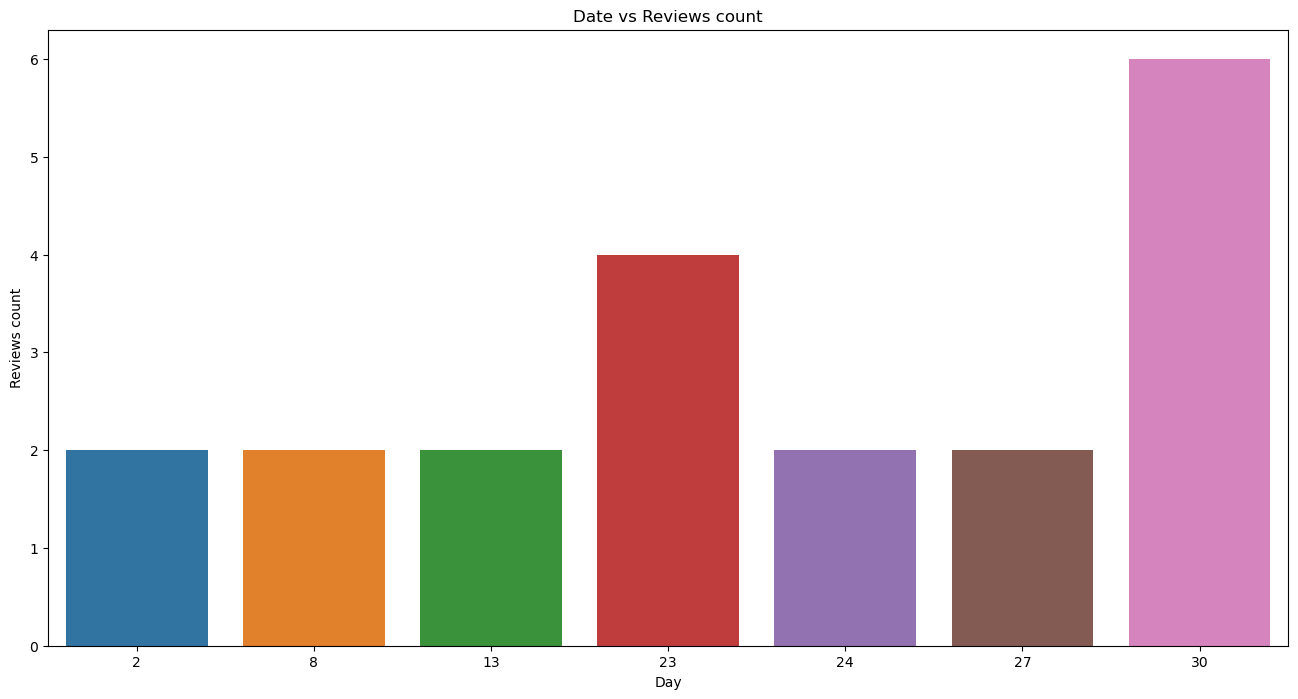

In [159]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Day')['Review'].count()).reset_index()
dayreview['Day'] = dayreview['Day'].astype('int64')
dayreview.sort_values(by = ['Day'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Day", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()


# Part 2 : Emotion Mining

#### Import the required libraries

In [161]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ne_chunk, pos_tag

!pip install wordcloud
from wordcloud import WordCloud

#### Load the Reviews Data

In [165]:
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/11/reviews.csv')
data

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nProduct is fabulous but he...,4K Picture is fabulous if you have good intern...,Reviewed in India 🇮🇳 on 23 June 2023
1,4.0,4.0 out of 5 stars\nGood TV,TV is good but it's sound is not that much. Ne...,Reviewed in India 🇮🇳 on 13 July 2023
2,4.0,4.0 out of 5 stars\nPicture quality good,Good performance but TV lags as seems slow pro...,Reviewed in India 🇮🇳 on 8 July 2023
3,4.0,4.0 out of 5 stars\nVedio clarity need to improve,The display pannel clarity need to improve for...,Reviewed in India 🇮🇳 on 27 June 2023
4,4.0,4.0 out of 5 stars\nGood,Very nice,Reviewed in India 🇮🇳 on 30 June 2023
5,4.0,4.0 out of 5 stars\nNice product,i like this product..sound could be more loud.,Reviewed in India 🇮🇳 on 23 June 2023
6,4.0,4.0 out of 5 stars\nOneplus Y1S Pro 50 inches....,Picture quality:4K Picture quality in Ott apps...,Reviewed in India 🇮🇳 on 24 January 2023
7,4.0,4.0 out of 5 stars\nNice picture quality,Product looks amazing but remote operation is ...,Reviewed in India 🇮🇳 on 2 July 2023
8,4.0,4.0 out of 5 stars\nPlease don't purchase from...,Product very good but amazon service is very b...,Reviewed in India 🇮🇳 on 30 June 2023
9,4.0,4.0 out of 5 stars\nBest budget tv,"Tv is fine , although could be better if it di...",Reviewed in India 🇮🇳 on 30 May 2023


####  Text Preprocessing

In [163]:
def preprocess_text(text):
# Remove leading and trailing characters
   text = text.strip()
    
# Remove empty strings
   if not text:
        return ' '
# Remove Twitter username handles
   text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    
# Remove punctuations
   text = text.translate(str.maketrans('', '', string.punctuation))
     
# Remove URLs or links
   text = re.sub(r'http\S+|www\S+', '', text)
    
# Convert to lowercase
   text = text.lower()
     
   return text
    

In [166]:
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

In [169]:
# Tokenization and Joining the list into one string/text
import nltk
nltk.download('punkt')

data['Tokens'] = data['Cleaned_Review'].apply(word_tokenize)
data['Joined_Review'] = data['Tokens'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [170]:
# Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
data['Tokens'] = data['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [171]:
# Stemming 
stemmer = PorterStemmer()
data['Tokens'] = data['Tokens'].apply(lambda x: [stemmer.stem(word) for word in x])



# Feature Extraction

##### Feature Extraction using BoW (CountVectorizer)

In [172]:
count_vectorizer = CountVectorizer()
bow_features = count_vectorizer.fit_transform(data['Joined_Review'])

##### Feature Extraction using CountVectorizer with N-grams (Bigrams & Trigrams)

In [173]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3))
ngram_features = ngram_vectorizer.fit_transform(data['Joined_Review'])

##### Feature Extraction using TF-IDF Vectorizer

In [174]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['Joined_Review'])

# Generate Word Cloud

In [175]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

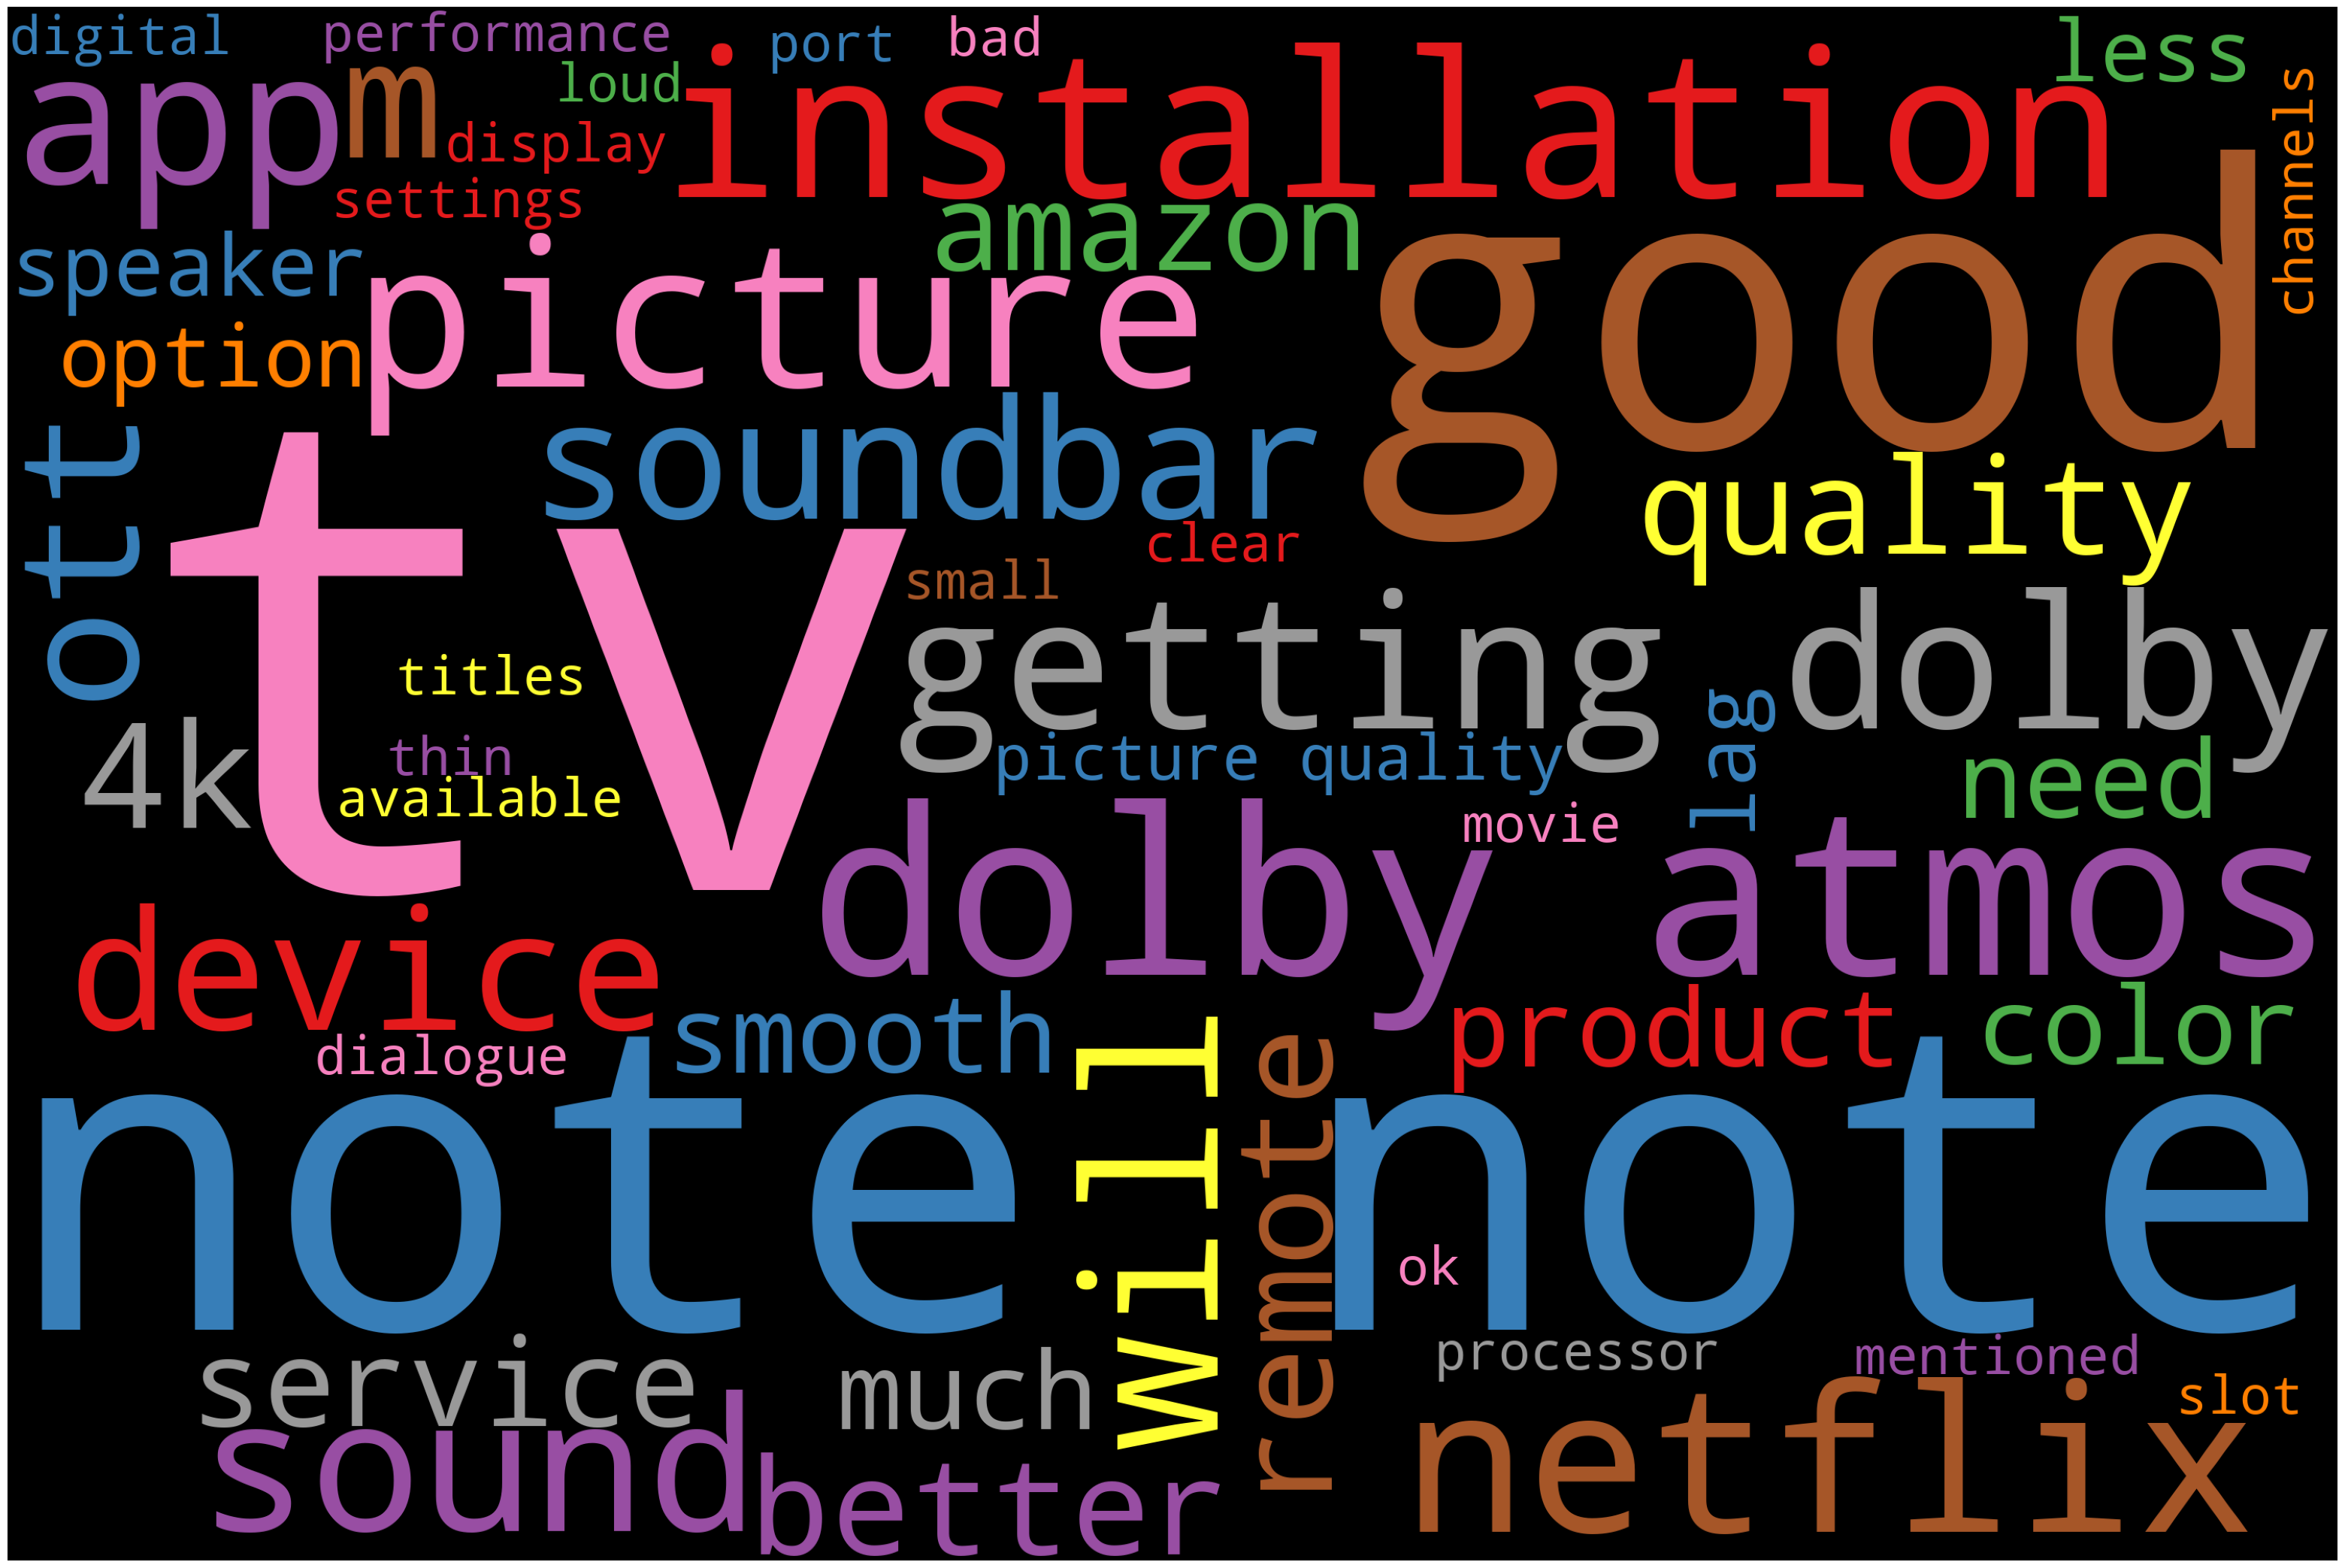

In [176]:
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

clean_tweets = ' '.join(data['Cleaned_Review'])

wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50,
                      colormap='Set1', stopwords=STOPWORDS).generate(clean_tweets)

plot_cloud(wordcloud)



# Named Entity Recognition (NER)

In [177]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk import ne_chunk, pos_tag
from collections import Counter


def filter_nouns_verbs(text):
    # Perform Named Entity Recognition (NER)
    entities = []
    for chunk in ne_chunk(pos_tag(nltk.word_tokenize(text))):
        if hasattr(chunk, 'label'):
            entities.append(' '.join(c[0] for c in chunk))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [178]:
# Filter out nouns and verbs
def filter_nouns_verbs(text):
    nouns_verbs = []
    for word, tag in pos_tag(nltk.word_tokenize(text)):
        if tag.startswith('NN') or tag.startswith('VB'):
            nouns_verbs.append(word.lower())
    
    return nouns_verbs

In [179]:
# Apply filtering to the 'Cleaned_Review' column
data['Nouns_Verbs'] = data['Cleaned_Review'].apply(lambda x: filter_nouns_verbs(x))

In [180]:
# Count the occurrences of nouns and verbs
noun_counts = Counter()
verb_counts = Counter()
for nv_list in data['Nouns_Verbs']:
    noun_counts.update([nv for nv in nv_list if nltk.pos_tag([nv])[0][1].startswith('NN')])
    verb_counts.update([nv for nv in nv_list if nltk.pos_tag([nv])[0][1].startswith('VB')])

In [181]:
# Get the top 10 most common nouns and verbs
top_10_nouns = noun_counts.most_common(10)
top_10_verbs = verb_counts.most_common(10)



In [182]:
# Print the word and count for top 10 nouns
print("Top 10 Nouns:")
for word, count in top_10_nouns:
    print(f"{word:<15} {count}")

Top 10 Nouns:
tv              24
note            24
picture         18
’               14
atmos           14
quality         12
installation    12
m               10
soundbar        8
sound           8


In [183]:
# Print the word and count for top 10 verbs
print("\nTop 10 Verbs:")
for word, count in top_10_verbs:
    print(f"{word:<15} {count}")


Top 10 Verbs:
is              44
are             18
have            16
be              12
getting         10
has             6
using           4
mentioned       4
viewing         2
compared        2


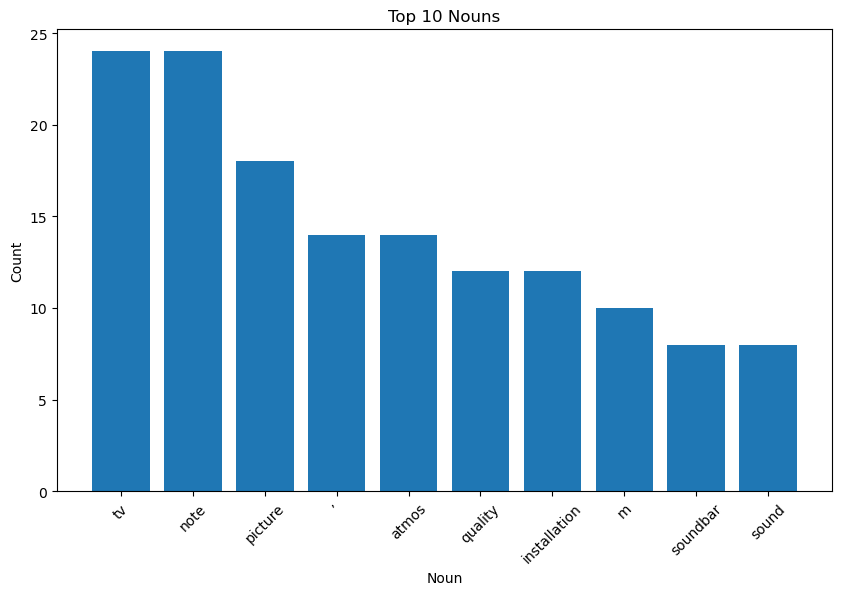

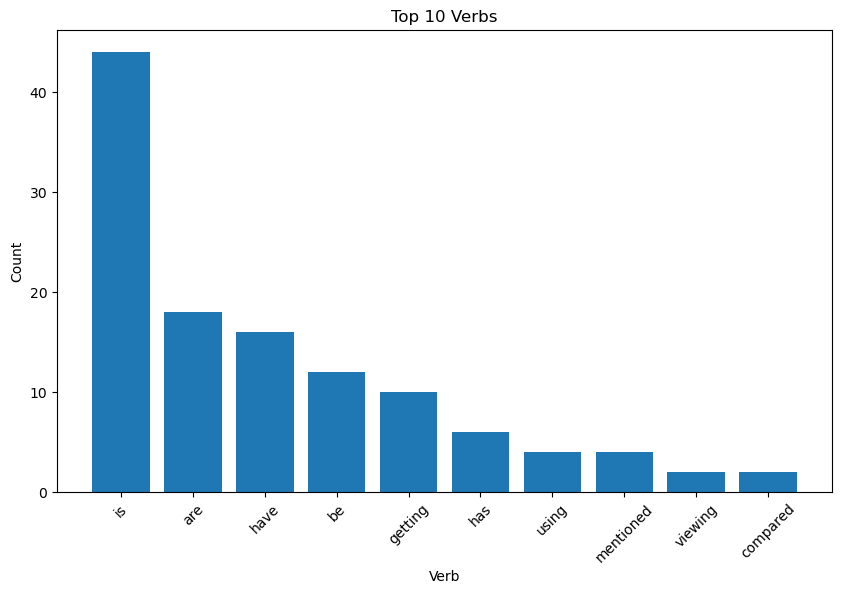

In [184]:
# Visualize the results (Barchart for top 10 nouns + verbs)
fig, ax = plt.subplots(figsize=(10, 6))
x = [word for word, count in top_10_nouns]
y = [count for word, count in top_10_nouns]
ax.bar(x, y)
ax.set_title('Top 10 Nouns')
ax.set_xlabel('Noun')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = [word for word, count in top_10_verbs]
y = [count for word, count in top_10_verbs]
ax.bar(x, y)
ax.set_title('Top 10 Verbs')
ax.set_xlabel('Verb')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis

In [185]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download Vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/deeptilalwani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [186]:
# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

In [187]:
# Custom function to calculate sentiment score for a sentence
def calculate_sentiment_score(sentence):
    sentiment_score = sia.polarity_scores(sentence)['compound']
    return sentiment_score

In [189]:
# Calculate sentiment score for each sentence in the 'Cleaned_Review' column
data['Sentiment_Score'] = data['Cleaned_Review'].apply(calculate_sentiment_score)


In [191]:
# Calculate the number of words in each sentence
data['Word_Count'] = data['Cleaned_Review'].apply(lambda x: len(nltk.word_tokenize(x)))

In [192]:
# Calculate sentiment scores for the whole review
total_sentiment_score = data['Sentiment_Score'].sum()
total_negative_sentiment_score = data[data['Sentiment_Score'] < 0]['Sentiment_Score'].sum()
total_positive_sentiment_score = data[data['Sentiment_Score'] > 0]['Sentiment_Score'].sum()

whole_review_sentiment_score = data['Sentiment_Score'].sum()

In [193]:
# Print sentiment score statistics
print("Sentiment Score Statistics:")
print(data['Sentiment_Score'].describe())
print("Sentiment Score of the Whole Review:", whole_review_sentiment_score)

Sentiment Score Statistics:
count    20.000000
mean      0.344410
std       0.540394
min      -0.674100
25%      -0.064400
50%       0.418300
75%       0.837500
max       0.991600
Name: Sentiment_Score, dtype: float64
Sentiment Score of the Whole Review: 6.8882


In [194]:
# Print sentiment scores
print("Sentiment Analysis Results:")
print("Total Sentiment Score:", total_sentiment_score)
print("Total Negative Sentiment Score:", total_negative_sentiment_score)
print("Total Positive Sentiment Score:", total_positive_sentiment_score)

Sentiment Analysis Results:
Total Sentiment Score: 6.8882
Total Negative Sentiment Score: -2.1134
Total Positive Sentiment Score: 9.0016


In [195]:
# Add an index column
data['Index'] = range(1, len(data) + 1)



In [197]:
print(data[['Index', 'Rating','Review', 'Cleaned_Review', 'Tokens', 'Sentiment_Score']])

    Index  Rating                                             Review  \
0       1     4.0  4K Picture is fabulous if you have good intern...   
1       2     4.0  TV is good but it's sound is not that much. Ne...   
2       3     4.0  Good performance but TV lags as seems slow pro...   
3       4     4.0  The display pannel clarity need to improve for...   
4       5     4.0                                          Very nice   
5       6     4.0     i like this product..sound could be more loud.   
6       7     4.0  Picture quality:4K Picture quality in Ott apps...   
7       8     4.0  Product looks amazing but remote operation is ...   
8       9     4.0  Product very good but amazon service is very b...   
9      10     4.0  Tv is fine , although could be better if it di...   
10     11     4.0  4K Picture is fabulous if you have good intern...   
11     12     4.0  TV is good but it's sound is not that much. Ne...   
12     13     4.0  Good performance but TV lags as seems slow pr

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_1817/3440300955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sentiment_Score'], bins=20, kde=True)


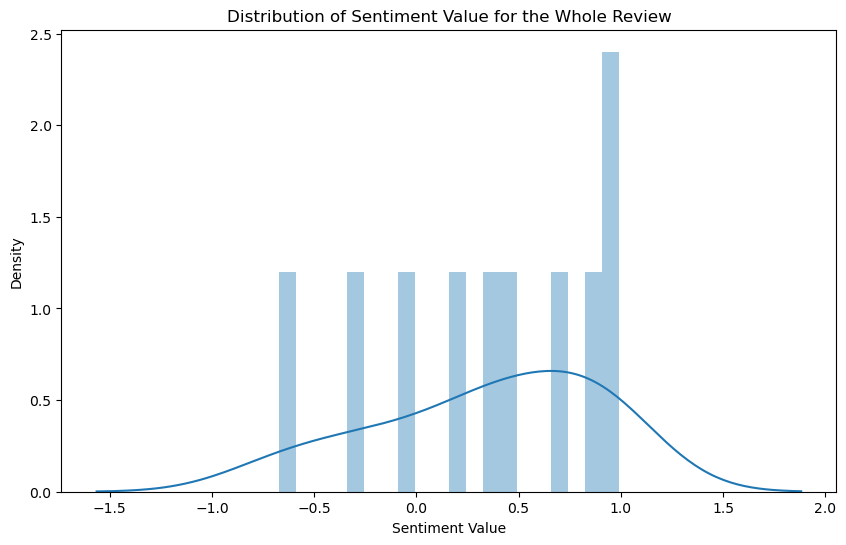

In [198]:
# Plot sentiment value for the whole review
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(data['Sentiment_Score'], bins=20, kde=True)

# Add plot title and labels
plt.title('Distribution of Sentiment Value for the Whole Review')
plt.xlabel('Sentiment Value')
plt.ylabel('Density')

# Show the plot
plt.show()

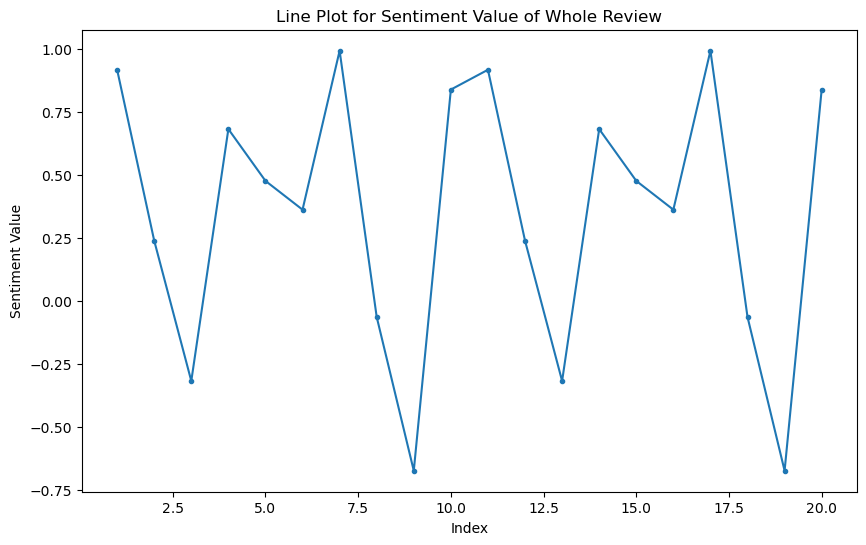

In [199]:
# Plot line plot for sentiment value of the whole review
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Index'], data['Sentiment_Score'], marker='o', linestyle='-', markersize=3)
ax.set_title('Line Plot for Sentiment Value of Whole Review')
ax.set_xlabel('Index')
ax.set_ylabel('Sentiment Value')
plt.show()

In [200]:
# Correlation analysis
correlation = data['Sentiment_Score'].corr(data['Word_Count'])
print("Correlation between Sentiment Score and Word Count:", correlation)

Correlation between Sentiment Score and Word Count: 0.5469340126817424


##### A correlation coefficient of 0.5469 suggests that there is a moderate positive relationship between sentiment score and word count in the text data.
##### It implies that, on average, longer texts tend to have slightly higher sentiment scores, and shorter texts tend to have slightly lower sentiment scores

##### The strength of this relationship is not very strong, indicating that there might be other factors influencing the sentiment scores in the data.

